In [88]:
%matplotlib inline
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

In [106]:
import os
myCmd1 = 'g++ __main__.cpp -o a'
myCmd2 = './a'

In [174]:
def afficheHisto_1data(data):
    gagnant = data[:,2]
    labels, counts = np.unique(gagnant, return_counts=True)
    plt.bar(labels, counts, align='center', color = "orange")
    #plt.hist(gagnant, color="orange", bins=3)

    plt.xticks([0, 1, 2],["Egalité", "Blanc", "Noir"])
    plt.title("Nombre de parties gagnées")   #add sur cb de parties ?
    print("Nombre d'égalité, de victoires de blanc, de victoires de Noir : ", counts)
    
def afficheHisto_moy(moy, std, N):
    plt.bar([0, 1, 2], moy, align='center', color = "orange")
    plt.xticks([0, 1, 2],["Egalité", "Blanc", "Noir"])
    plt.title("Nombre de parties gagnées")   #add sur cb de parties ?
    print("Nombre d'égalité, de victoires de blanc, de victoires de Noir en moyenne: ", moy)
    
    for i in range(3):
        plt.axhline(y = moy[i]+std[i], xmin=i*(1/3)+0.04, xmax=(i+1)*(1/3)-0.04, c='k', linestyle="dashed")
        plt.axhline(y = moy[i]-std[i], xmin=i*(1/3)+0.04, xmax=(i+1)*(1/3)-0.04, c='k', linestyle="dashed")
    plt.axhline(y = N/2, xmin=0, xmax=3, c="darkred", linestyle="dashed")
    

In [175]:
def stats(N):
    print("Nombre de set de parties sur lequel on moyenne: ", N)
    nbVict = np.zeros((N,3))   # tableau du nb de vict pour chaque set de data 
    for i in range(N):         # (0 = egalité, 1 = blanc, 2 = noir)
        os.system(myCmd1)
        os.system(myCmd2)
        data = np.loadtxt("resultats.dat", delimiter = ' ')   #[scoreB, scoreN, gagnant]
        gagnant = data[:,2]
        nbVict[i][0] = np.sum(gagnant == 0)
        nbVict[i][1] = np.sum(gagnant == 1)
        nbVict[i][2] = np.sum(gagnant == 2)
        
    afficheHisto_moy(np.mean(nbVict, axis=0), np.std(nbVict, axis=0), N)
    #print(np.std(nbEgalite), np.std(nbVictB), np.std(nbVictN))
    

Nombre de set de parties sur lequel on moyenne:  1000
Nombre d'égalité, de victoires de blanc, de victoires de Noir en moyenne:  [ 42.058 503.985 453.957]


NameError: name 'N' is not defined

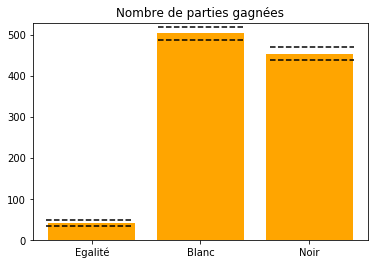

In [176]:
stats(1000)